# Beer suggestions model

## Information 

### Dataset
A dataset of up to 50 top-rated beers across 112 styles, 5558 beers in total. Source: BeerAdvocate.com. 

### Data

<b> ABV: </b> Alcohol by volume (amount of % is alcohol)

<b> IBU: </b> International bitterness units (we made an avarage in the data)

| IBU / EBU | Bitterness |
| --- | --- |
|5 - 20 | Not very bitter |
|20 - 30 | Lightly bitter |
|30 - 45 | Bitter |
|> 45 | Very bitter |

<b> Ave Rating: </b> Average rating

<b> Astringency: </b> How it feels on the tongue


## Imports

In [981]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Get data

In [982]:
Dataset = r'data/beer_data_set.csv'
columns_to_load = ["Name", "Style", "Style Key", "Brewery", "Description", "ABV", "Ave Rating", "Min IBU", "Max IBU", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]
df = pd.read_csv(Dataset, usecols=columns_to_load)
df.head()

,Name,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,Double Bag,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,Scurry,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218


## Visualize the data

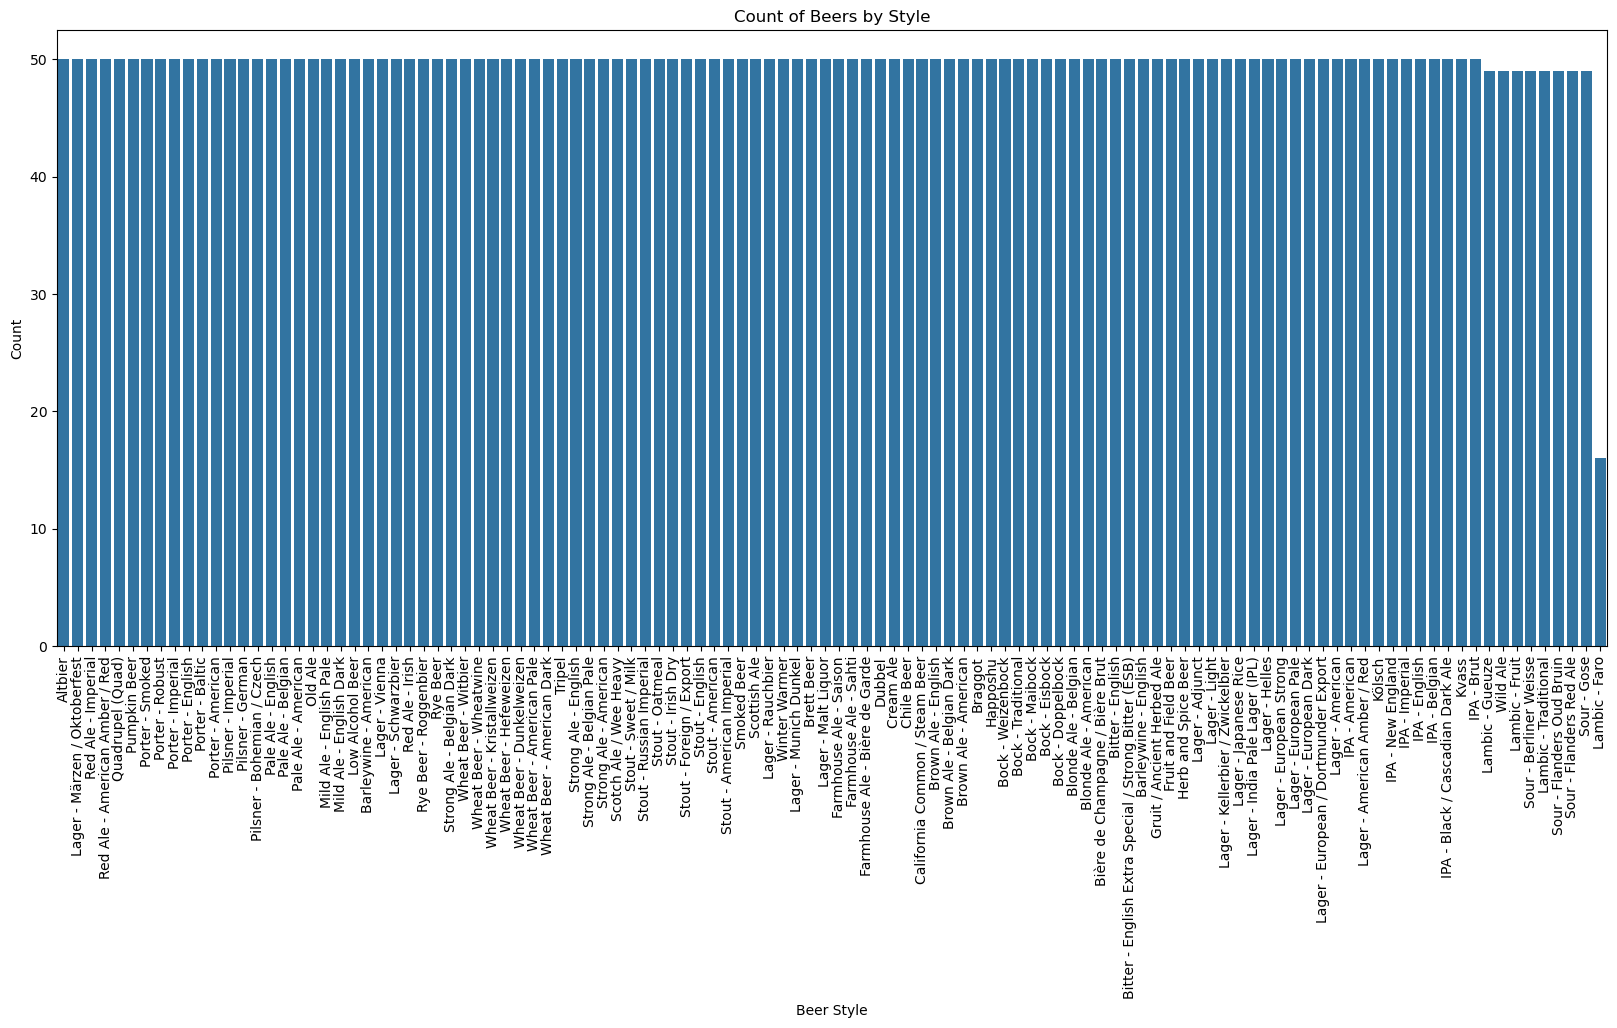

In [983]:
import matplotlib.pyplot as plt
import seaborn as sns

style_counts = df['Style'].value_counts()

plt.figure(figsize=(20, 8))
sns.barplot(x=style_counts.index, y=style_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.title('Count of Beers by Style')
plt.show()

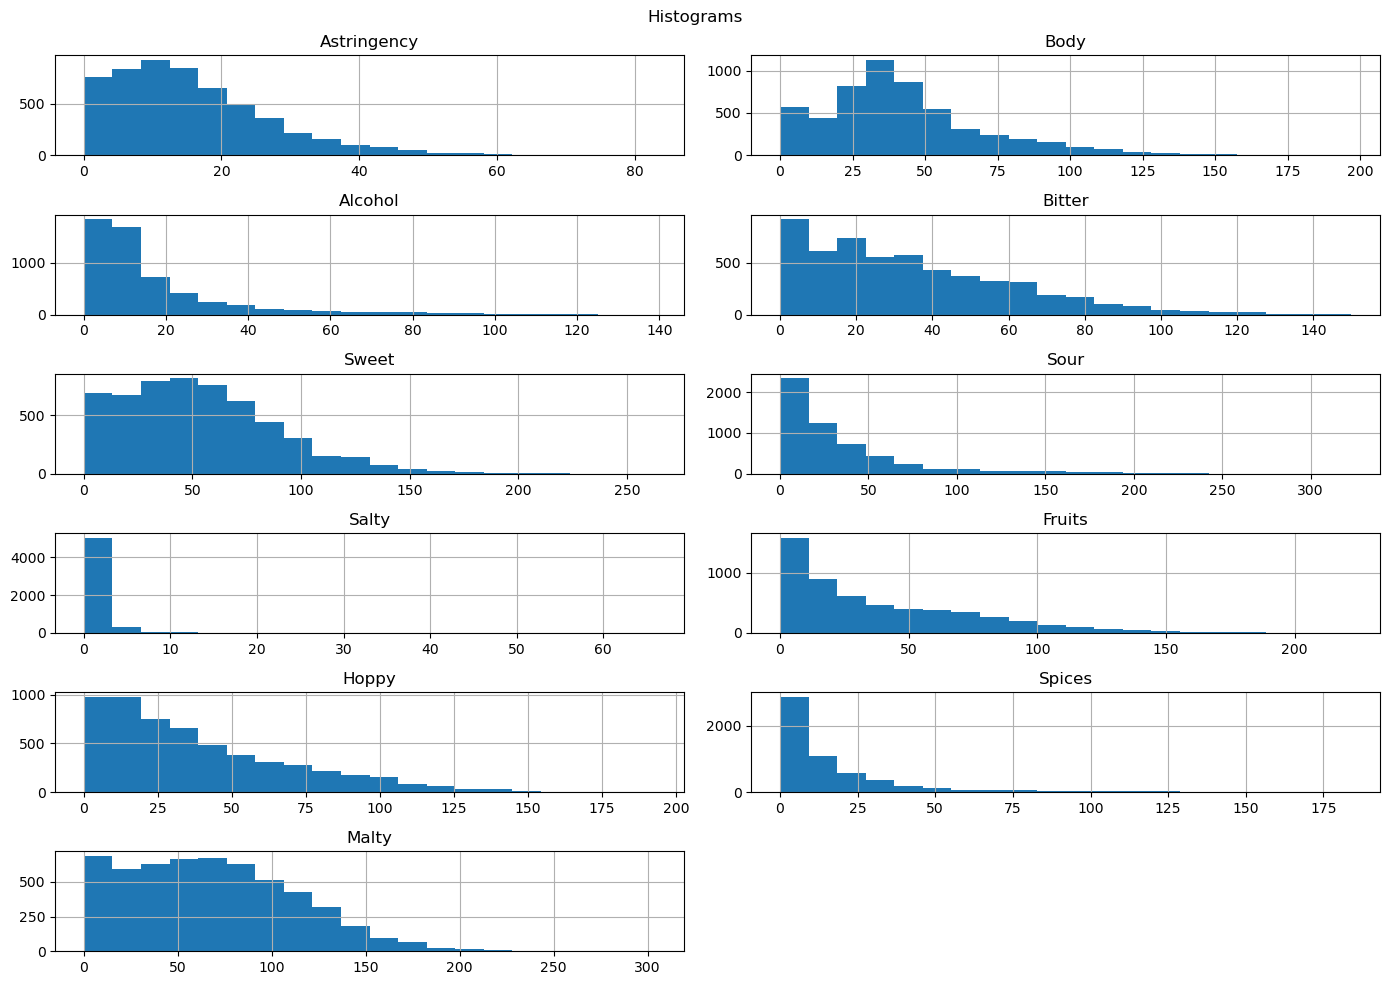

In [984]:
input_columns = ["Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"]

df[input_columns].hist(bins=20, figsize=(14, 10), layout=(6, 2))
plt.suptitle('Histograms')
plt.tight_layout()
plt.show()

## Prepare the data for machine learning algorithms

In [985]:
df['IBU'] = (df['Min IBU'] + df['Max IBU']) / 2
df = df.drop(['Min IBU', 'Max IBU'], axis=1)
input_columns.append('IBU')
df = df.dropna()

Error for column Astringency: Bin labels must be one fewer than the number of bin edges
Error for column Body: Bin labels must be one fewer than the number of bin edges
Error for column Alcohol: Bin labels must be one fewer than the number of bin edges
Error for column Bitter: Bin labels must be one fewer than the number of bin edges
Error for column Sweet: Bin labels must be one fewer than the number of bin edges
Error for column Sour: Bin labels must be one fewer than the number of bin edges
Error for column Fruits: Bin labels must be one fewer than the number of bin edges
Error for column Hoppy: Bin labels must be one fewer than the number of bin edges
Error for column Spices: Bin labels must be one fewer than the number of bin edges
Error for column Malty: Bin labels must be one fewer than the number of bin edges
Error for column IBU: Bin labels must be one fewer than the number of bin edges


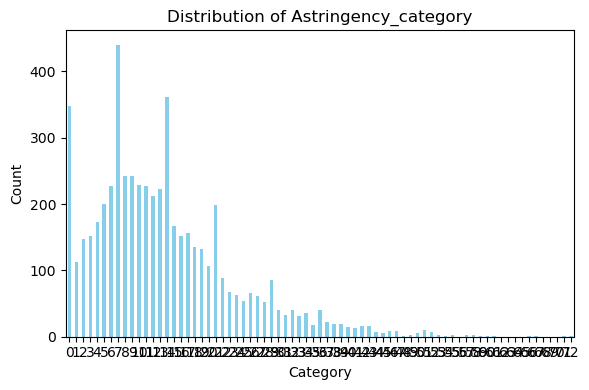

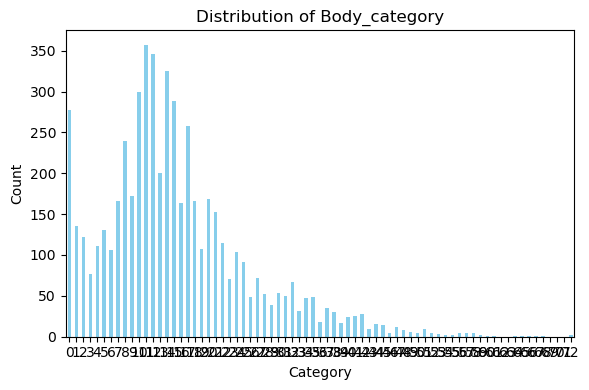

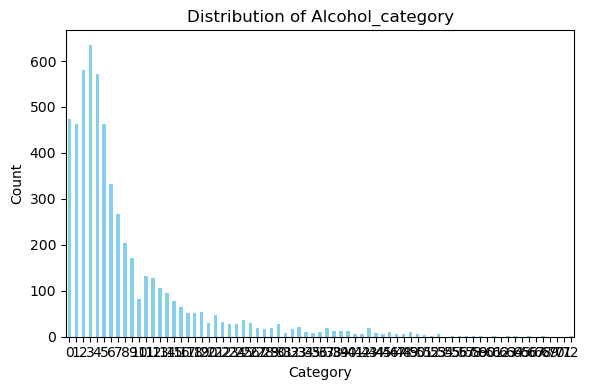

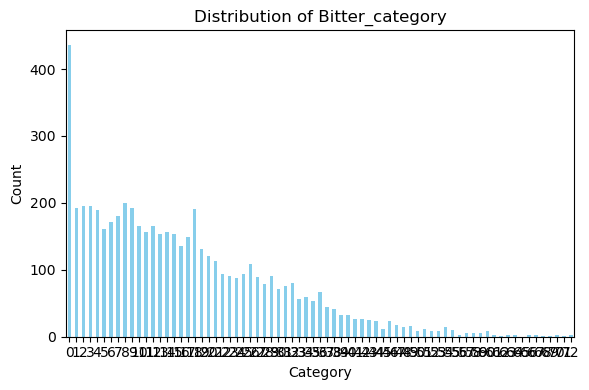

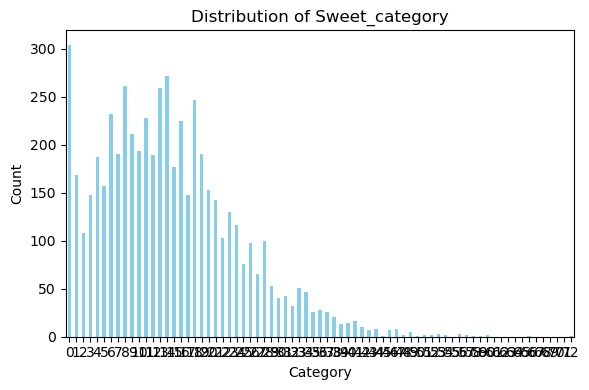

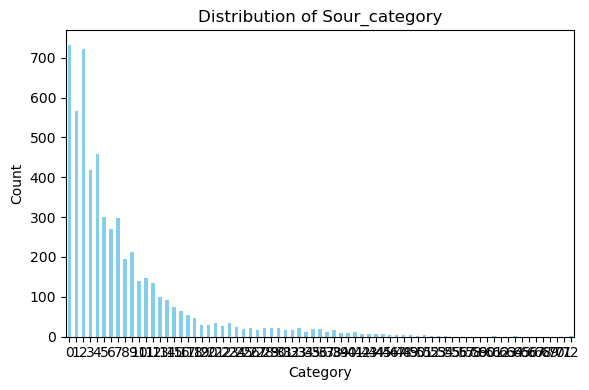

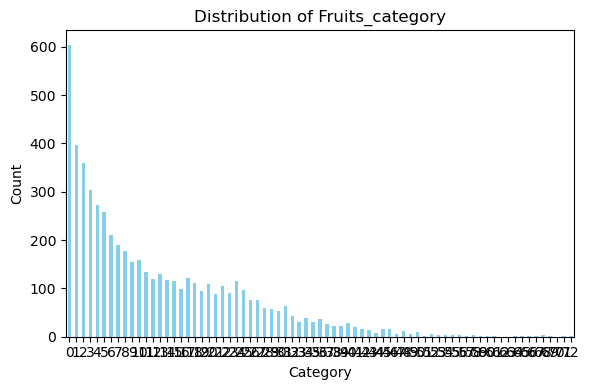

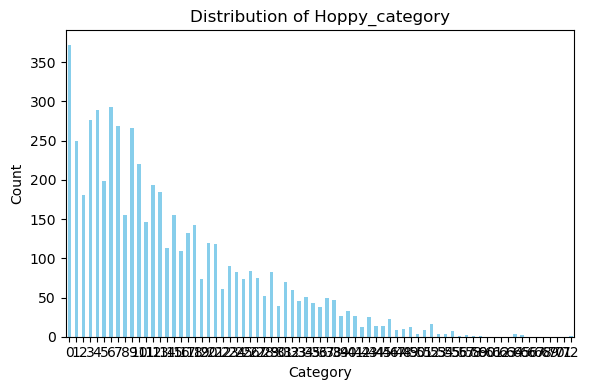

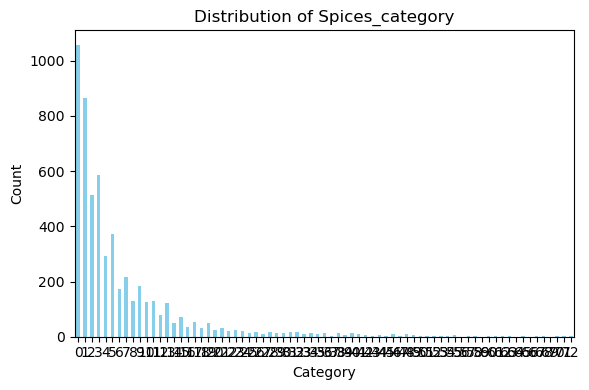

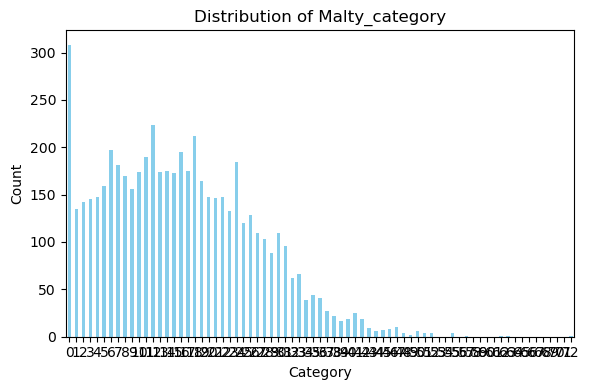

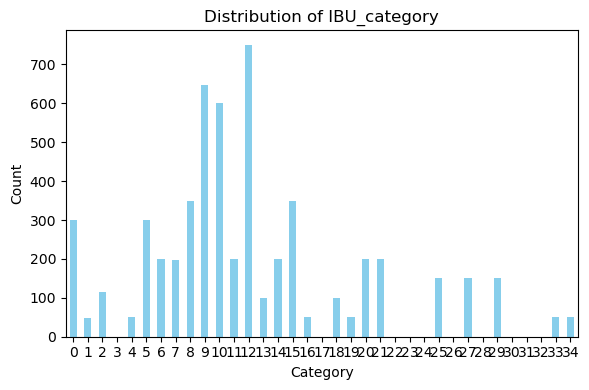

In [986]:
df['Salty_category'] = pd.cut(df["Salty"], bins=[-0.1, 0, df["Salty"].max()], labels=[0, 1])

input_columns.remove('Salty')

num_quantiles = 100

for col in input_columns:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)
    
    if num_unique_values < num_quantiles:
        print(f"Warning: {col} has {num_unique_values} unique values which is less than the number of quantiles ({num_quantiles}). Adjusting quantiles.")
        num_quantiles = num_unique_values  
    try:
        df[col + '_category'] = pd.qcut(df[col], q=num_quantiles, labels=range(num_quantiles), duplicates='drop')
    except ValueError as e:
        print(f"Error for column {col}: {e}")
        df[col + '_category'] = pd.cut(df[col], bins=num_quantiles, labels=range(num_quantiles), include_lowest=True)

category_columns = [col + '_category' for col in input_columns]

for col in category_columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Finalize the data

In [987]:
#select the target
y = df['Style Key']

#select what you give as input
X = df[category_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select a model and train it

In [988]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6906474820143885


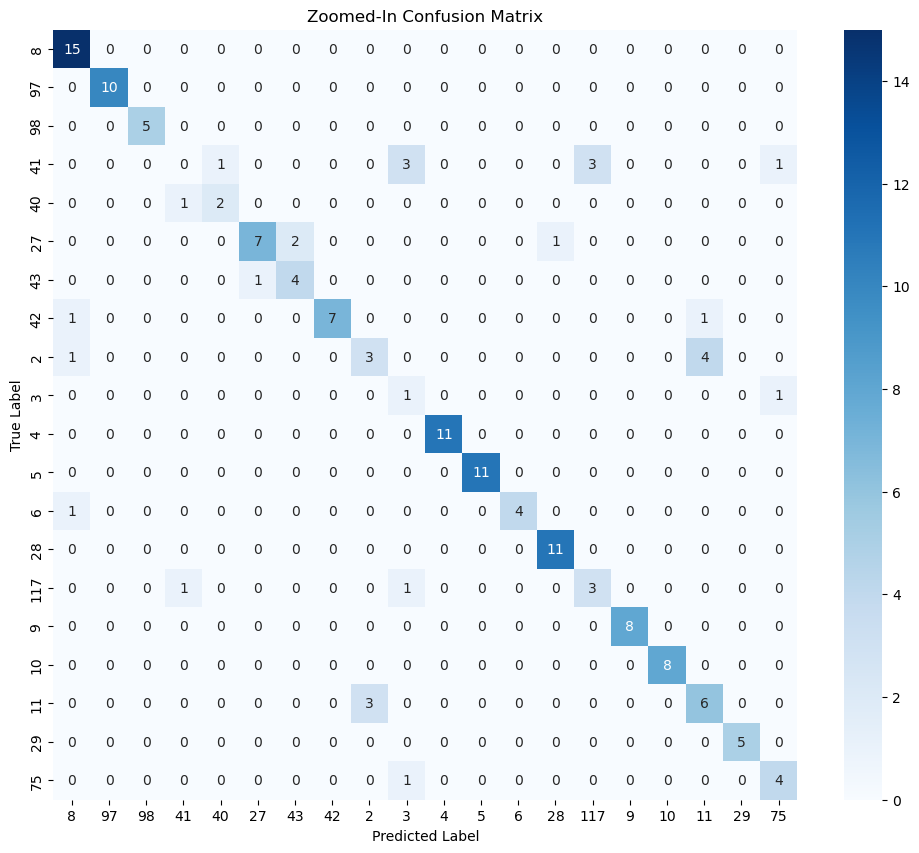

In [989]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

start_index = 0
end_index = 20

conf_matrix_zoomed = conf_matrix[start_index:end_index, start_index:end_index]

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_zoomed, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['Style Key'].unique()[start_index:end_index], 
            yticklabels=df['Style Key'].unique()[start_index:end_index])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Zoomed-In Confusion Matrix')
plt.show()